# <font color = red>Total mark: 5/5</font>

Quiz7_Group 9
Group Members

    Rashida Salih
    Japheth Kasomo
    Vincent Wayuga
    Jeannnette Mukangango
    Yusuf Brima

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Let consider the following ODE

$$
\begin{cases}
-k\dfrac{d^2u}{dx^2} + u &= &g(x), \quad \text{ on } [0,2]\\[0.3cm]
u(0) =\alpha\\
u(2) =\beta
\end{cases}
$$

The discretize for of the above equation is given by

$$
\begin{cases}
-\dfrac{k}{h^2}(u_{i-1}-2u_i+u_{i+1})+u_i &= & g(x_i), \quad i = 1,\cdots,N-1\\[0.3cm]
u_0  = \alpha\\
u_N = \beta
\end{cases}
$$

The system can be written in matrix form as:$\quad AU = B$

Write a python function <b> Mat_AB</b> that takes <b>a,b,k,h,g, $\alpha$, $\beta$ </b> and returns the matrix $A$ and vector $B$.

Note that <b>a</b> and <b>b</b> are respectively the lower and upper bound of the interval on which the equation is defined. 

In [2]:
"""
Mark:2/2
"""
def Mat_AB(a,b,k,alpha,beta,h,g):
    N = int((b -a)/h)
    x = np.linspace(a,b,N+1)
    B = np.zeros(N+1)
    B[0] = alpha
    B[-1] = beta
    A =  np.zeros((N+1,N+1))
    A[0,0] = 1
    A[-1,-1] = 1
    for i in range(1,N):
        B[i]=g(x[i])
        A[i,i-1] = -k/(h**2)
        A[i,i] = ((2*k)/h**2) + 1
        A[i,i+1] = -k/(h**2)
    return A,B

2. Solve the system with $\alpha= -1, h= 0.01, g(x)= -15e^{2x}+x^2-9, k=4$ and $\beta=e^4+3$

In [3]:
"""
Mark:1.5/1.5
"""
a=0
b=2
h=0.01
k=4
alpha=0
N = int((b -a)/h)
beta= np.exp(4) + 3
g= lambda x: -15*np.exp(2*x)+x**2 - 9
A,B=Mat_AB(a,b,k,alpha,beta,h,g)

3. Tha exact solution  of the above equation is given by

$$u(x) = e^{2x}+x^2-1$$

Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

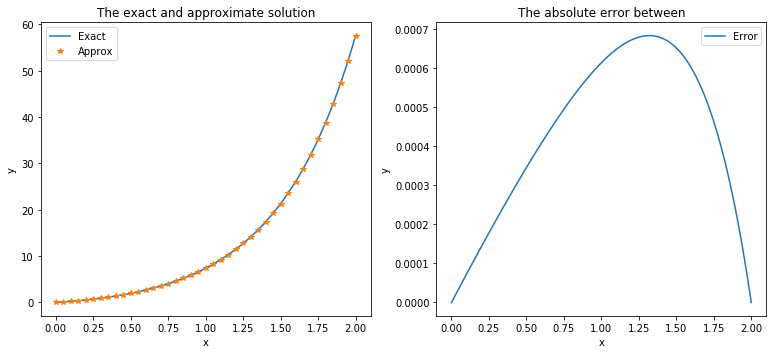

In [4]:
"""
Mark:1.5/1.5
"""
U_approx = np.linalg.solve(A,B)
x = np.linspace(a,b,N+1)
F_U= lambda x: np.exp(2*x)+(x**2) - 1
U_exact = F_U(x)

fig = plt.figure(1, figsize=(13,5.4))
plt.subplot(1,2,1)
plt.plot(x,U_exact)
plt.plot(x[::5],U_approx[::5],'*')
plt.title('The exact and approximate solution')
plt.legend(["Exact","Approx"])
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(1,2,2)
plt.plot(x,abs(U_exact - U_approx))
plt.title('The absolute error between')
plt.legend(["Error"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()